# Digit Recogniser

The given task:
"In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare."

The data:

    Training:
    42,000 images of digits
    Column 0: Number depicted by image
    Column 1-784: Pixel intensity (0 black, 255 white)
    
    Example:
|label | pixel 0 | pixel 1 | pixel 2 | ... | pixel 783|
|------|---------|---------|---------|-----|----------|
|3     | 0       | 16      | 94      | ... | 43       |
    

In [40]:
# Imports
%matplotlib inline
import pandas as pd
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
print("Successfully imported modules")

Successfully imported modules


## 1. Preparing the data

Read files and separate information from training into labels and data

Reading files
	Reading training...
       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
6           0       0       0       0       0       0       0       0       0   
7           0       0       0       0       0       0       0       0       0   
8           0       0       0       0       0       0       0       0       0   
9           0       0       0       0       0       0       0       0       0   
10          0       0       0       0       0       0       0       0     

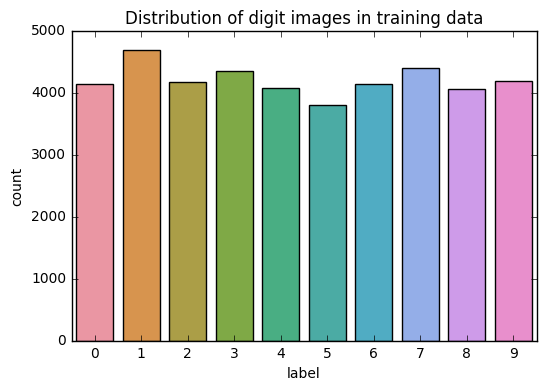

42000
42000


In [92]:
print("Reading files\n\tReading training...")
training = pd.read_csv("train.csv")
train_x = training["label"]
train_y = training.drop("label", axis = 1)
print(train_y)

del training
print("\tReading testing...")
test_y = pd.read_csv("test.csv")
print("Finished")
cp = sns.countplot(train_x)
cp.set_title("Distribution of digit images in training data")
plt.show(cp)
print(len(train_x))
print(len(train_y))

Normalisation

In [ ]:
def train_classifier(inputs, outputs, batch_size):
    training_data = tf.data.Dataset.from_tensor_slices((dict(train_x), train_y))
    training_data = training_data.shuffle(1000).repeat().batch(batch_size)
    return training_data.make_one_shot_iterator().get_next()



tf.reset_default_graph()
classifier = tf.estimator.DNNClassifier(
    feature_columns=train_x,
    # Two layers of 10 nodes
    hidden_units=[10, 10],
    # 10 classes: 0-9
    n_classes=10)

print("Training classifier...")

print(len(train_x))
print(train_x[0])
print(len(train_y))

classifier.train(
    input_fn = lambda:train_classifier(train_x, train_y, 100),
    steps = 1000)

print("Finished training")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': 'worker', '_keep_checkpoint_max': 5, '_model_dir': '/var/folders/9x/0llvldjs3qdbgxvbn2z6lg2m0000gn/T/tmprblwxbb0', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x16190acc0>, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_num_ps_replicas': 0, '_task_id': 0, '_tf_random_seed': None, '_log_step_count_steps': 100, '_master': '', '_service': None, '_save_summary_steps': 100, '_num_worker_replicas': 1, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None}
Training classifier...
42000
1
42000
